In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
import random
%matplotlib inline


In [17]:
#read data
df = pd.read_csv("adult.csv", header=None)
df.columns = ["age","workclass","fnlwgt","education","education-num",
              "marital-status","occupation","relationship","race","sex",
              "capital-gain","capital-loss","hours-per-week","native-country","income"]
df.shape

(32561, 15)

In [18]:
#clean data
#df.duplicated().sum()
df.drop_duplicates(keep = 'first', inplace = True)
#df.shape
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)
#df.shape
df.drop(columns='fnlwgt', axis=1, inplace=True)
df.shape    
   

(30139, 14)

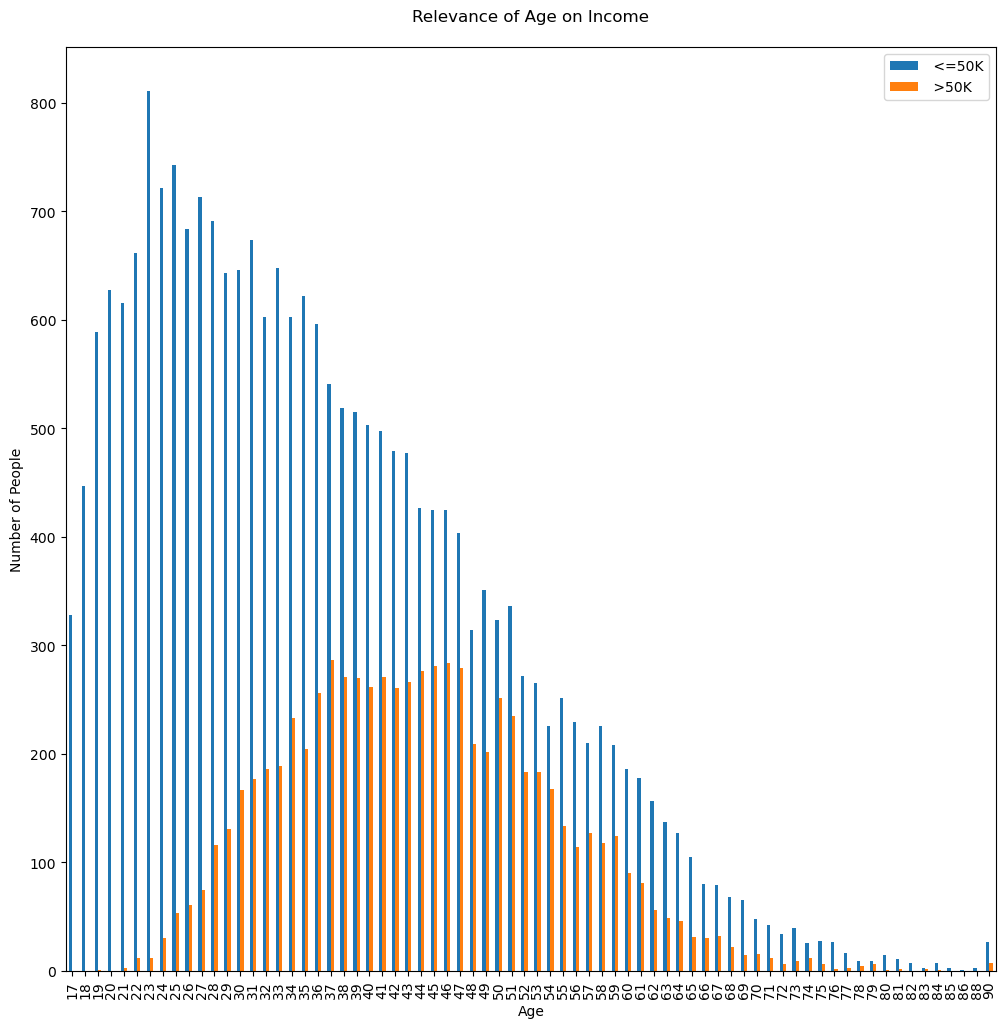

In [32]:
#01 User Story - Age vs Income(Bar Chart)
df_1 = df.groupby(['age','income']).size().to_frame('count')
df_1.reset_index().pivot_table(index="income", columns="age", values="count").T.plot(kind='bar',figsize=(12, 12))
plt.title("Relevance of Age on Income\n")
plt.ylabel("Number of People")
plt.xlabel("Age")
plt.legend()
plt.show()


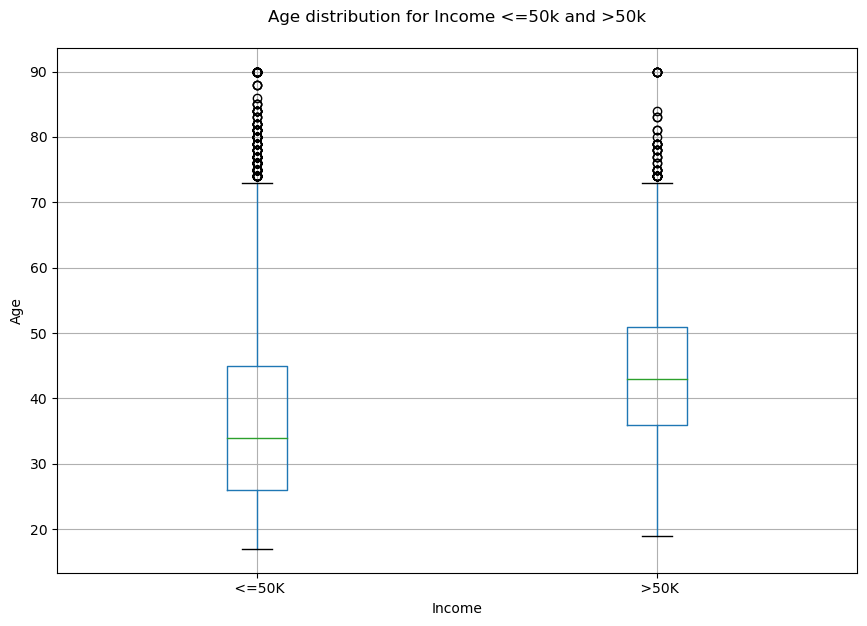

In [38]:
#01 User Story - Age vs Income(Box Plot)
df_1=df.boxplot(column='age', by='income', figsize=(10,7))
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age distribution for Income <=50k and >50k\n')
plt.suptitle('')
plt.show()

Text(0.5, 1.0, 'Education distribution in income more than 50k \n')

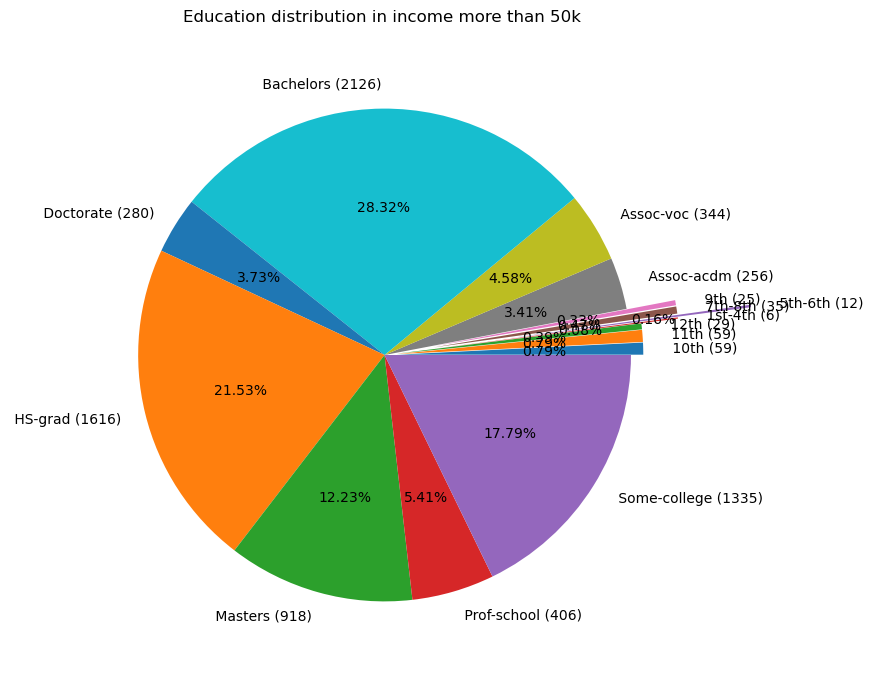

In [40]:
#02 User Story - Education vs Income(Bar chart)
df_less_than_50k = df[df['income']==' <=50K']
df_more_than_50k = df[df['income']==' >50K']

count_education = df.groupby('education').count()
count_education.index
list_edu_income = count_education['income']

explode_edu = (0.05, 0.05, 0.05, 0.2, 0.5, 0.2,0.2,0,0,0,0,0,0,0,0)
count_education = df_more_than_50k.groupby('education').count()
fig = plt.figure(figsize=(20,8))
labels_edu = ["{} ({})".format(i,j) for i,j in zip(count_education.index, count_education['income']) ]
plt.pie(count_education['income'], labels=labels_edu, explode=explode_edu, autopct='%1.2f%%', shadow=False)
plt.title('Education distribution in income more than 50k \n')

Text(0.5, 1.0, 'Education distribution in income less than 50k \n')

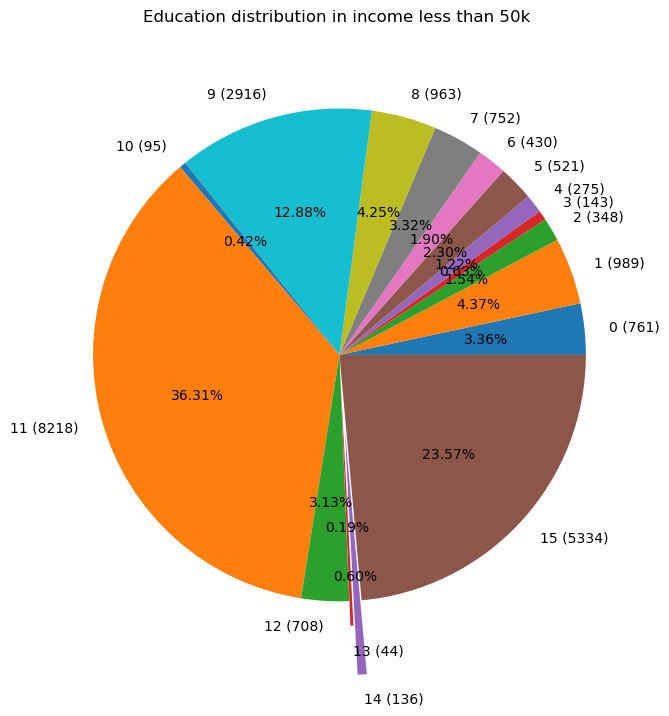

In [39]:
explode_edu = (0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.3,0)
count_education = df_less_than_50k.groupby('education').count()
fig = plt.figure(figsize=(20,8))
labels_edu = ["{} ({})".format(i,j) for i,j in zip(count_education.index,count_education['income']) ]
plt.pie(count_education['income'],labels=labels_edu,explode=explode_edu,autopct='%1.2f%%',shadow=False)
plt.title('Education distribution in income less than 50k \n')

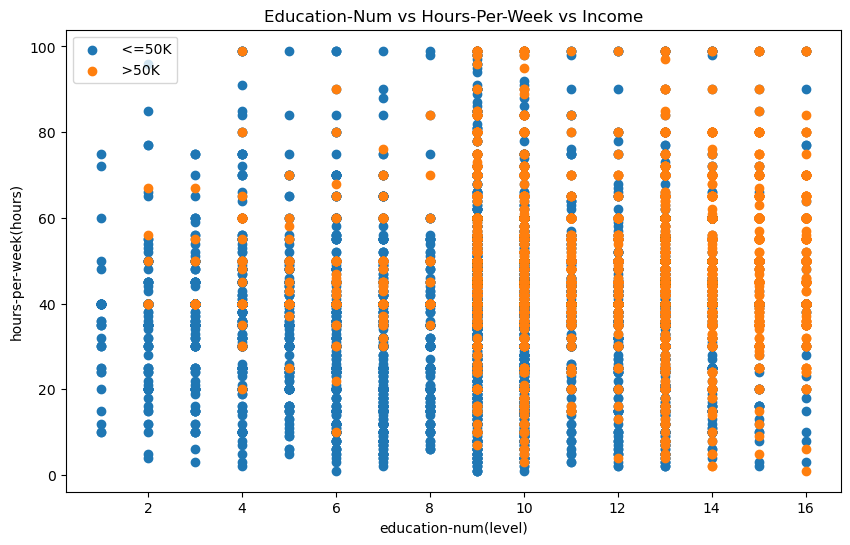

In [41]:
#03 User Story - Education-Num vs Hours-Per-Week vs Income(Scatter Plot)
object_columns=["workclass","education",
              "marital-status","occupation","relationship","race","sex",
              "native-country","income"]
numerical_data=df.copy()
for str_col in object_columns:
    numerical_data[str_col] = numerical_data[str_col].astype('category').cat.codes

df_less_than_50k = numerical_data[numerical_data['income']==0]
df_more_than_50k = numerical_data[numerical_data['income']==1]

plt.figure(figsize=(10,6))
plt.scatter(df_less_than_50k['education-num'], df_less_than_50k['hours-per-week'])
plt.scatter(df_more_than_50k['education-num'], df_more_than_50k['hours-per-week'])
plt.legend(df['income'].value_counts().index.tolist())
plt.xlabel("education-num(level)")
plt.ylabel("hours-per-week(hours)")
plt.title("Education-Num vs Hours-Per-Week vs Income")
plt.show()


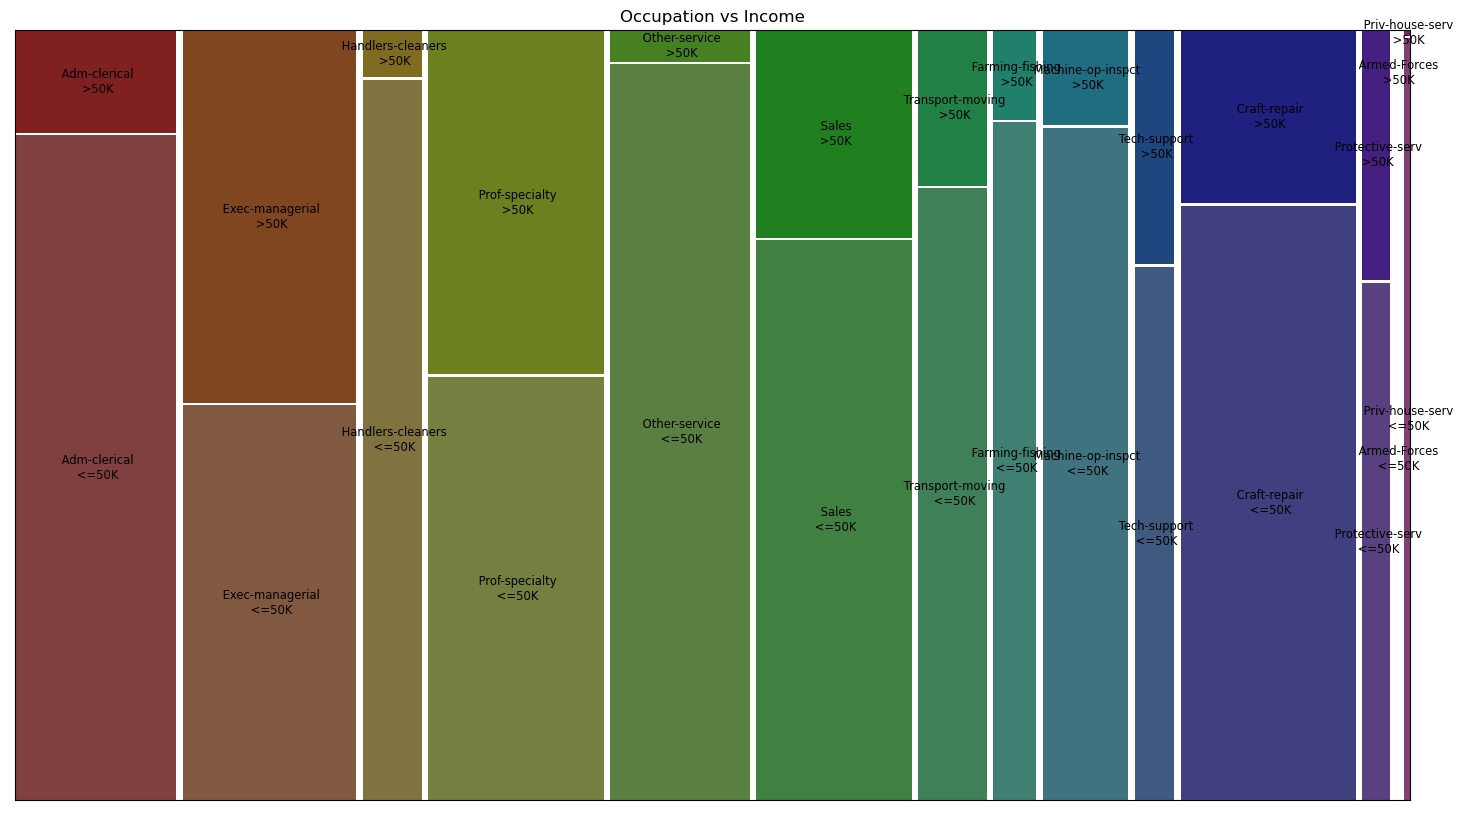

In [24]:
#04 User Story - Occupation vs Income(Mosaic Plot)
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,10))
mosaic(df, ['occupation', 'income'], ax=axes, axes_label=False, title="Occupation vs Income")
plt.show()

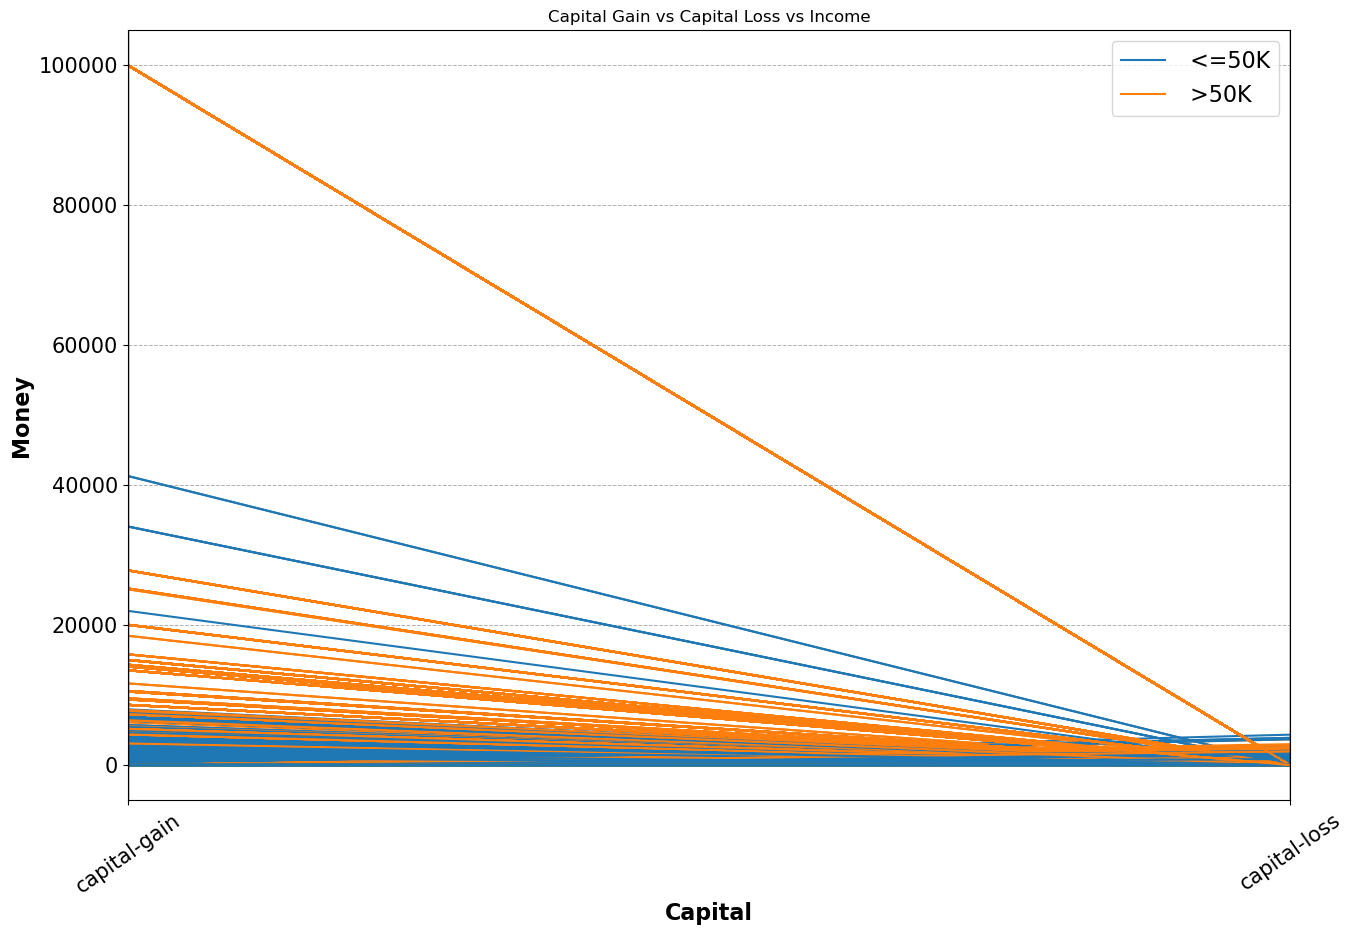

In [42]:
#05 User Story - Capital Gain vs Capital Loss vs Income(Parallel Coordinates Plot)

parallel_coordinates (df, 'income', cols=['capital-gain','capital-loss'], color=('#1f77b4', '#ff7f0e'))
plt.xlabel("Capital", fontsize=16, fontweight='bold')
plt.ylabel("Money", fontsize=16, fontweight='bold')
plt.xticks(rotation=35, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Capital Gain vs Capital Loss vs Income")
plt.legend(fontsize=16, loc='upper right')
plt.grid(linestyle='--', linewidth=0.7, axis='y')
plt.show()



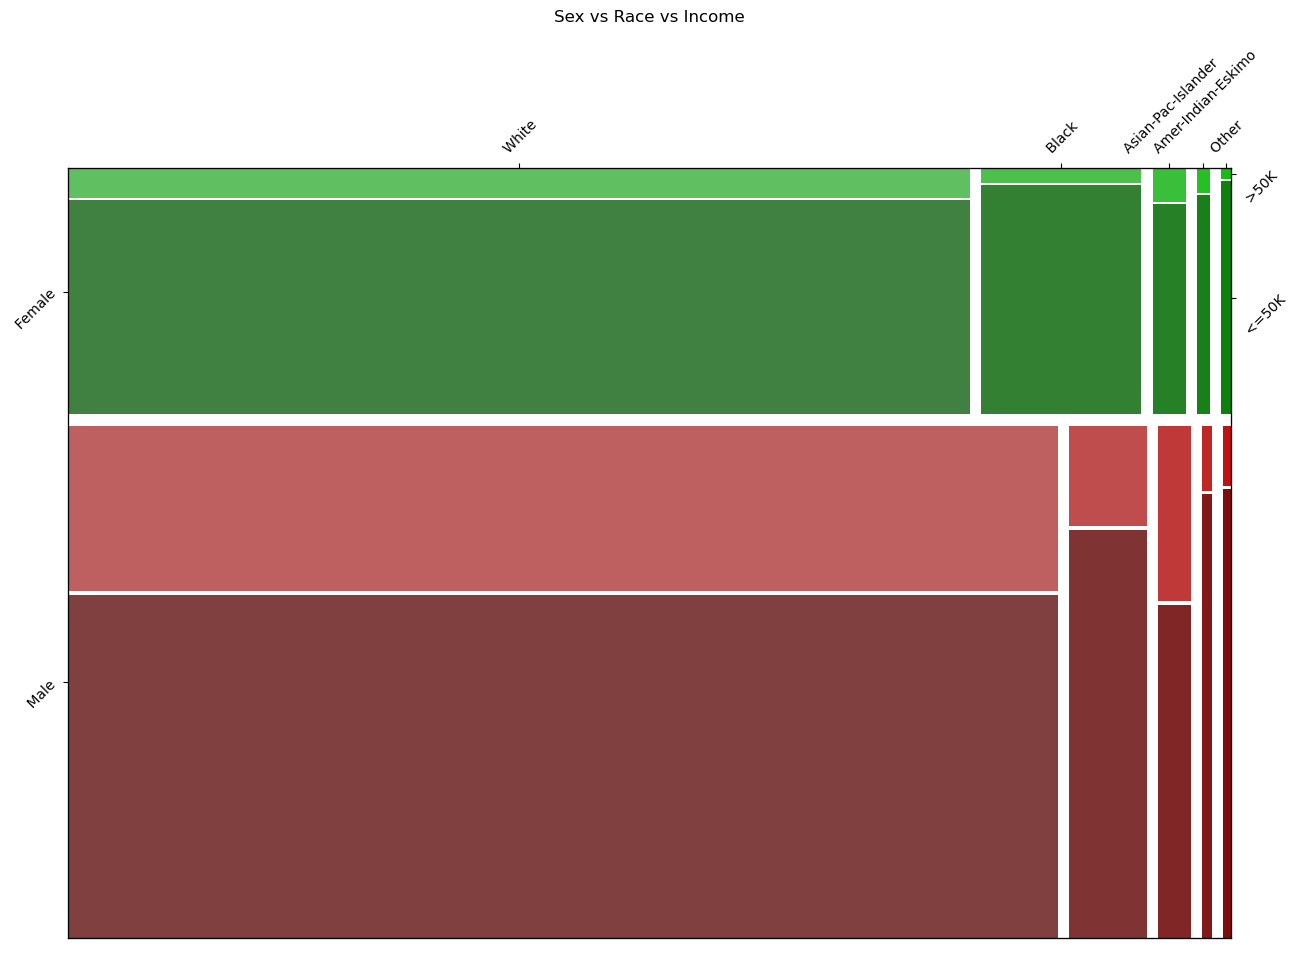

In [26]:
#06 User Story - Sex vs Race vs Income(Mosaic Plot)
def emptyLabelMosaic(k):
    return ''

def mosaicplots(col1, col2, col3, title):
    plt.rcParams["figure.figsize"]=(15, 10)
    if col3 is None:
        mosaic(df, [col1,col2],
           gap=0.015, 
           horizontal=True,
           title=title, 
           labelizer=emptyLabelMosaic,)
    else:
        mosaic(df, [col1,col2,col3],
           gap=0.015, 
           label_rotation=45.0, 
           horizontal=False,
           title=title, 
           labelizer=emptyLabelMosaic,)
    plt.show()

mosaicplots('sex', 'race','income', 'Sex vs Race vs Income\n')

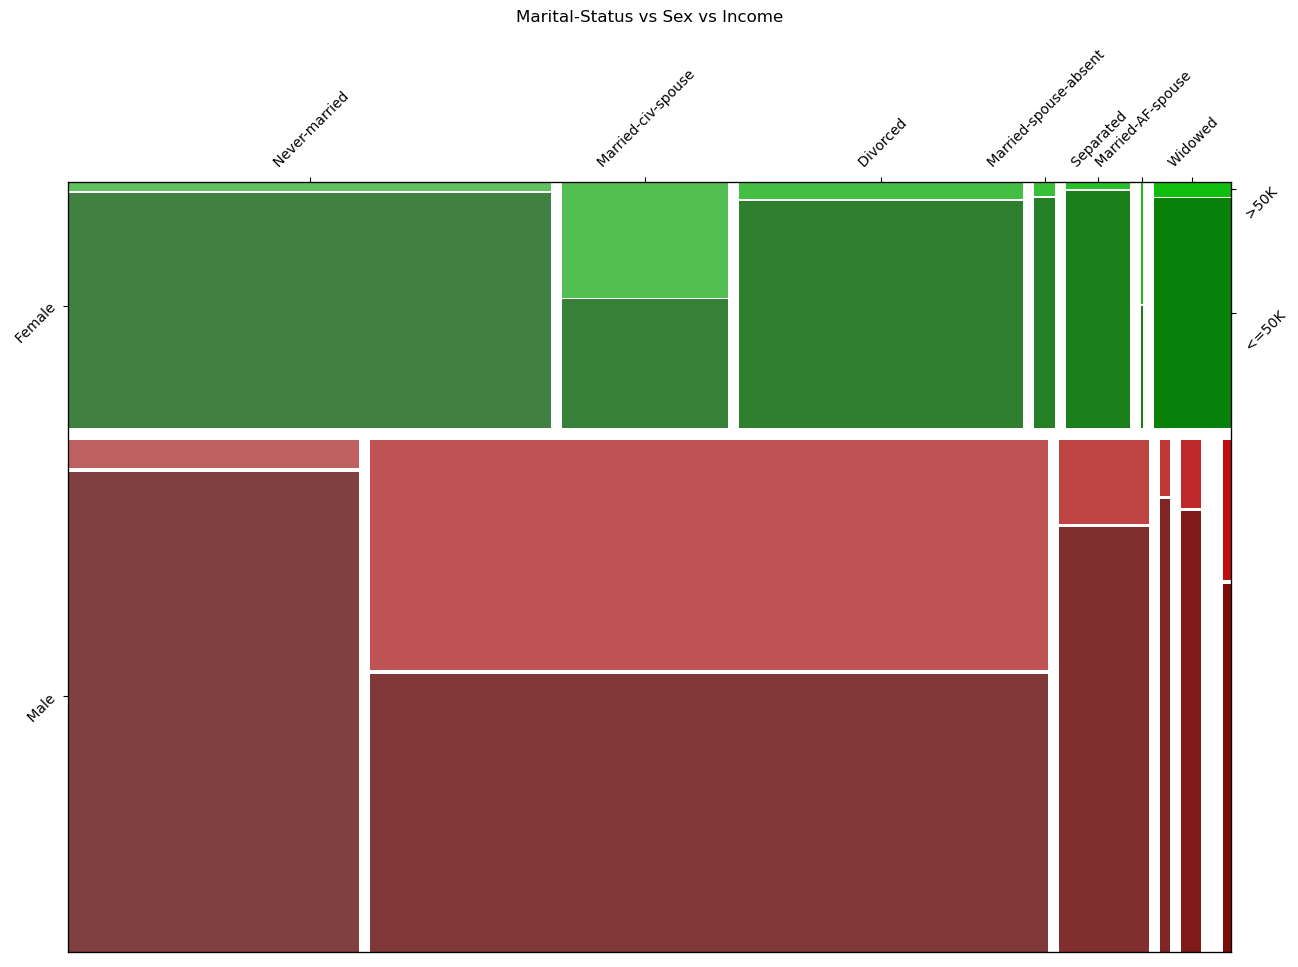

In [27]:
#07 User Story - Marital-Status vs Sex vs Income(Mosaic Plot)

mosaicplots('sex', 'marital-status',  'income', 'Marital-Status vs Sex vs Income\n')
